In [1]:
import numpy as np 
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
PATH = Path("/home/ubuntu/data")

In [6]:
df = pd.read_csv(PATH/"train.csv")

In [7]:
len(df)

196299

In [8]:
df_animals = df[df.category_id != 0] #removing null class from dataset

In [9]:
classes = df_animals["category_id"].unique()

In [10]:
classes_map = {classes[i]:i for i in range(len(classes))}

In [11]:
classes_map

{19: 0,
 3: 1,
 8: 2,
 4: 3,
 13: 4,
 1: 5,
 11: 6,
 16: 7,
 17: 8,
 14: 9,
 18: 10,
 10: 11,
 22: 12}

In [12]:
new_labels = [ classes_map[i] for i in df_animals["category_id"]]

In [13]:
df_animals["new_class"] = new_labels

In [14]:
train_df = df_animals[["file_name","new_class"]]

In [15]:
train_df.columns = ['name', 'label']

In [16]:
train_df.head()

,name,label
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,0
1,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,0
5,593d68d7-23d2-11e8-a6a3-ec086b02610b.jpg,1
6,59fae563-23d2-11e8-a6a3-ec086b02610b.jpg,2
12,595f7b9c-23d2-11e8-a6a3-ec086b02610b.jpg,3


In [17]:
trans = get_transforms(max_zoom=1)

In [18]:
data = ImageDataBunch.from_df(PATH, train_df, "train", size=448, bs=64, ds_tfms=trans)

In [19]:
# data.show_batch(rows=3)

In [20]:
from fastai.metrics import error_rate, accuracy
from fastai.vision import models 
from fastai.vision import learner

In [21]:
learn = learner.create_cnn(data, models.resnet34, metrics=[error_rate,accuracy]).to_fp16() 

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


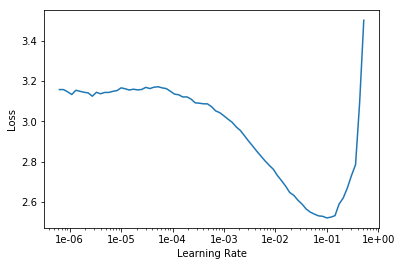

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(3,1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.954981,1.071481,0.363819,0.636181,26:54
1,0.703416,0.551473,0.188541,0.811459,25:49
2,0.565449,0.442694,0.149985,0.850015,25:45


In [31]:
learn.save('class_mode1_1')

In [32]:
learn.fit_one_cycle(3,1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.757110,0.710790,0.242057,0.757943,25:48
1,0.646515,0.515501,0.174506,0.825494,25:49
2,0.549611,0.419102,0.143353,0.856647,25:44


In [33]:
learn.save('class_mode1_2')

In [34]:
learn.unfreeze()

In [35]:
learn.fit_one_cycle(5, [1e-8,1e-4,1e-3])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.547472,0.456340,0.155999,0.844001,31:18
1,0.472171,0.416726,0.142890,0.857110,31:18
2,0.421347,0.347580,0.120990,0.879010,31:17
3,0.333363,0.294660,0.102329,0.897671,31:15
4,0.300337,0.280007,0.095774,0.904226,31:15


In [36]:
learn.save('class_model_unfreeze2')

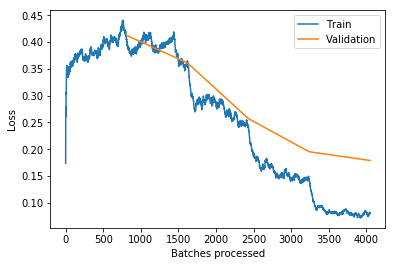

In [31]:
learn.recorder.plot_losses()

In [26]:
data = ImageDataBunch.from_df(PATH, train_df, "train", size=840, bs=32, ds_tfms=trans)

In [27]:
learn = learner.create_cnn(data, models.resnet34, metrics=[error_rate,accuracy]).to_fp16() 

In [28]:
learn.load("class_model_unfreeze2")

Learner(data=ImageDataBunch;

Train: LabelList (51874 items)
x: ImageList
Image (3, 840, 840),Image (3, 840, 840),Image (3, 840, 840),Image (3, 840, 840),Image (3, 840, 840)
y: CategoryList
0,0,1,2,3
Path: /home/ubuntu/data;

Valid: LabelList (12968 items)
x: ImageList
Image (3, 840, 840),Image (3, 840, 840),Image (3, 840, 840),Image (3, 840, 840),Image (3, 840, 840)
y: CategoryList
0,0,8,0,0
Path: /home/ubuntu/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [29]:
learn.freeze()

In [30]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


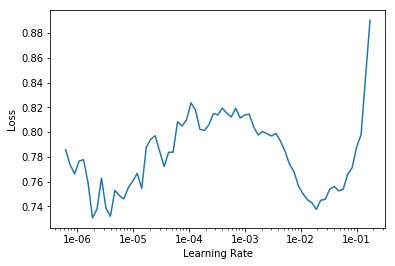

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.495916,0.367421,0.127545,0.872455,1:19:32
1,0.500438,0.405856,0.140191,0.859809,1:19:42
2,0.450764,0.341336,0.115361,0.884639,1:19:38
3,0.397880,0.283680,0.099321,0.900679,1:19:39
4,0.349649,0.273800,0.095466,0.904534,1:19:37


In [33]:
learn.save('big-840-images')

# Get Preds on train set
Get predicitons from train set to usse with ensemble method

In [34]:
from fastai.vision import ImageImageList
test_data = ImageImageList.from_df(df, PATH/"train", cols="file_name")

In [35]:
learn.data.add_test(test_data)
preds, y = learn.get_preds(ds_type=DatasetType.Test)
np.save(PATH/"animal_preds_train_res34", preds)

In [25]:
# interp = ClassificationInterpretation.from_learner(learn)

In [26]:
# interp.plot_confusion_matrix()

## Interperation

In [27]:
# class_map_reversed = {v:k for k,v in classes_map.items() }

In [28]:
# animals={
# 0:"nothing",
# 1: "deer",
# 2: "moose",
# 3: "squirrel",
# 4: "rodent",
# 5: "small_mammal",
# 6: "elk",
# 7: "pronghorn_antelope",
# 8: "rabbit",
# 9: "bighorn_sheep",
# 10: "fox", 
# 11: "coyote", 
# 12: "black_bear", 
# 13: "raccoon", 
# 14: "skunk", 
# 15: "wolf", 
# 16: "bobcat", 
# 17: "cat", 
# 18: "dog", 
# 19: "opossum", 
# 20: "bison", 
# 21: "mountain_goat", 
# 22: "mountain_lion"}

In [29]:
# confidence = [preds[i][j] for i,j in enumerate(final_preds)]


In [30]:
# threshold = 0.4

In [31]:
# final_preds = []
# for i,pred in enumerate(final_preds):
#     if preds[i][pred] < threshold:
#         final_preds.append(0)
#     else:
#         final_preds.append(class_map_reversed[pred])

In [32]:
# final_preds[:10]


In [33]:
# class_animal = [animals[class_map_reversed[i]] for i in final_preds.numpy()]
# 

In [34]:
# data.valid_dl.x


In [35]:
# df_dict = {}
# df_dict["correct"] = correct_preds
# df_dict["animal"] = class_animal
# df_dict["confidence"] = confidence

In [36]:
# df = pd.DataFrame.from_dict(df_dict)

In [37]:
# df.tail(n=15)

In [38]:
# data.valid_dl.x[12967]

## Submission

In [22]:
df_test = pd.read_csv(PATH/"test.csv")

In [23]:
learn.load('big-840-images')

Learner(data=ImageDataBunch;

Train: LabelList (51874 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
0,1,2,3,4
Path: /home/ubuntu/data;

Valid: LabelList (12968 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
7,8,4,6,2
Path: /home/ubuntu/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [25]:
from fastai.vision import ImageImageList
test_data = ImageImageList.from_df(df_test, PATH/'test', cols="file_name")
learn.data.add_test(test_data)
preds, y = learn.get_preds(ds_type=DatasetType.Test)

In [26]:
np.save(PATH/"test-animal-preds-res32-bigimg", preds)

In [42]:
# preds = np.load("../input/iwildfastaibaseline/preds-baseline-res50.npy")

In [43]:
# max_preds = np.argmax(preds, axis=1)

In [44]:
# confidence = [preds[i][j] for i,j in enumerate(max_preds)]

In [45]:
# class_map_reversed = {v:k for k,v in classes_map.items() }

In [46]:
# class_map_reversed

In [47]:
# threshold = 0.60
# final_preds = []
# for i,pred in enumerate(max_preds):
#     if preds[i][pred] < threshold:
#         final_preds.append(0)
#     else:
#         final_preds.append(class_map_reversed[pred])

In [48]:
# submdf = pd.read_csv("../input/iwildcam-2019-fgvc6/test.csv")

In [49]:
# df_test["Predicted"] =  final_preds


In [50]:
# df_subm = df_test[["id","Predicted" ]]
# df_subm.columns = [["Id","Predicted" ]]

In [51]:
# df_subm.head()

In [52]:
# df_subm.to_csv("aniaml-predsres50.csv", index=False)